In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($filterTypes_0:[SecurityTypeEnum!]!,$limit_1:[SecurityLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenSecurities25Yc4F:screenSecurities(filterTypes:$filterTypes_0,filterCategory:[],limit:$limit_1,first:100) {edges {node {symbol}}}}'
variables = {'filterTypes_0': ['EQUITY'], 'limit_1':[{'type':'MARKET_CAP','min':68000000000,'inclusive':True},{'type':'DIVIDEND_YIELD','min':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
symbols = [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['_screenSecurities25Yc4F']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-26 to 2019-06-26 - 98'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
PEP,64,4.189117,1.661039,2.421646,2.206724
CB,64,3.440335,1.372564,2.385075,3.456810
KO,64,3.964725,1.641122,2.314306,3.383609
MCD,64,3.548235,1.473967,2.294196,2.999196
MDLZ,64,4.238085,1.902890,2.139597,3.693183
UL,64,4.264240,2.100383,1.950869,3.744979
SBUX,64,4.795832,3.043077,1.521212,4.600183
UN,64,3.367655,2.163347,1.479646,3.523673
PG,64,2.869479,1.973198,1.369762,4.809913


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['PEP'] -1.180301554642057 0.6 0.4413447988943503 2.4216463535364072
['PEP', 'CB'] -1.6329308010161245 0.2040765338058943 0.566353363181804 2.403360698003823


['PEP', 'CB']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['CB', 'PEP'], sr=0)

['CB', 'PEP'] 0.7704298969876983 0.2040765338058943 0.566353363181804 2.403360698003823
['CB', 'PEP', 'KO'] 0.510330532606533 0.3071876702577849 0.6031428623487483 2.373675782782333
['CB', 'PEP', 'KO', 'MCD'] 0.1004945624976043 0.29817760042803937 0.602316962069565 2.3538057655056135
['CB', 'PEP', 'KO', 'DEO'] 0.08521455543072803 0.3211656835261015 0.5640488719046266 2.101247077666091
['CB', 'PEP', 'KO', 'LMT'] 0.06802347823948021 0.1649153245524874 0.7031081536869929 2.07598130184891
['CB', 'PEP', 'KO', 'WMT'] 0.03985596841614039 0.2203384958061815 0.6195174726099589 2.0023007636181918
['CB', 'PEP', 'MCD', 'AMT'] 0.017809977003082567 0.11527294244091661 0.702537034562166 2.0511836842181514
['CB', 'PEP', 'MCD', 'WMT'] -0.040277561811711354 0.15942561544098513 0.6002968227473036 1.9972732039522172
['CB', 'PEP', 'MCD', 'NEE'] -0.12700118017081302 0.05729839756256375 0.6157004222666232 1.9837401834768558
['CB', 'PEP', 'DEO', 'WMT'] -0.15918280280853142 0.07878846460910356 0.56202873258236

['CB', 'PEP', 'DEO', 'WMT']

In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 6, ['CB', 'PEP', 'DEO', 'WMT'], sr=0)

['CB', 'PEP', 'DEO', 'WMT'] -0.15918280280853142 0.07878846460910356 0.5620287325823651 1.744714516112695
['CB', 'PEP', 'DEO', 'WMT', 'KO'] -0.4267654414452512 0.18826720035232966 0.5849673582024193 1.8586328033580266
['CB', 'PEP', 'DEO', 'WMT', 'KO', 'MCD'] -0.8144693223317642 0.198084668960884 0.587446008707352 1.9312266217442646
['CB', 'PEP', 'DEO', 'WMT', 'KO', 'NEE'] -0.8164898426018393 0.1743280753176664 0.6091820820804944 1.6878679401690757
['CB', 'PEP', 'DEO', 'WMT', 'MCD', 'UL'] -0.8255428935722643 0.17496544050197738 0.5994916659257584 1.870653803157463
['CB', 'PEP', 'DEO', 'WMT', 'MCD', 'UN'] -0.8392567347682375 0.16862845243806443 0.5921148127936982 1.792116685771087
['CB', 'PEP', 'DEO', 'WMT', 'MCD', 'LMT'] -0.839745485116945 0.11842814500585466 0.6418263698772004 1.7426586061958125
['CB', 'PEP', 'DEO', 'WMT', 'MCD', 'AMT'] -0.8527044695880909 0.09303614004282318 0.654259390369086 1.7294785675526232
['CB', 'PEP', 'DEO', 'WMT', 'MCD', 'NEE'] -0.9298885845946374 0.0737430998

['CB', 'PEP', 'DEO', 'WMT', 'MCD', 'NEE']

In [7]:
quote.setup_mask(['CB', 'PEP', 'DEO', 'WMT', 'MCD', 'NEE'])
quote.find_optimal_ratio(21, 3)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'CB': 0.11, 'PEP': 0.01, 'DEO': 0.16, 'WMT': 0.05, 'MCD': 0.48, 'NEE': 0.19},
 3.1432,
 0.8247)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,3.125904,0.825166,0.734551,2.719979,3.065254,3.619721,5.210103,3.586234,1.556751
PEP,64.0,4.189117,1.661039,0.437330,3.221889,4.408412,5.045809,7.553566,2.421646,2.206724
CB,64.0,3.440335,1.372564,0.399448,2.521303,3.309521,4.446320,6.796537,2.385075,3.456810
MCD,64.0,3.548235,1.473967,-0.558029,2.936136,3.803440,4.408109,6.412885,2.294196,2.999196
DEO,64.0,2.315008,1.673214,-0.756932,1.386040,2.162891,3.558060,5.984438,1.283961,2.233835
WMT,64.0,3.128232,3.334437,-1.971514,0.262400,2.681031,5.327759,9.208715,0.888176,3.343207
NEE,64.0,2.589700,2.905164,-2.317953,0.075171,2.082314,4.545932,9.475382,0.834044,3.651279


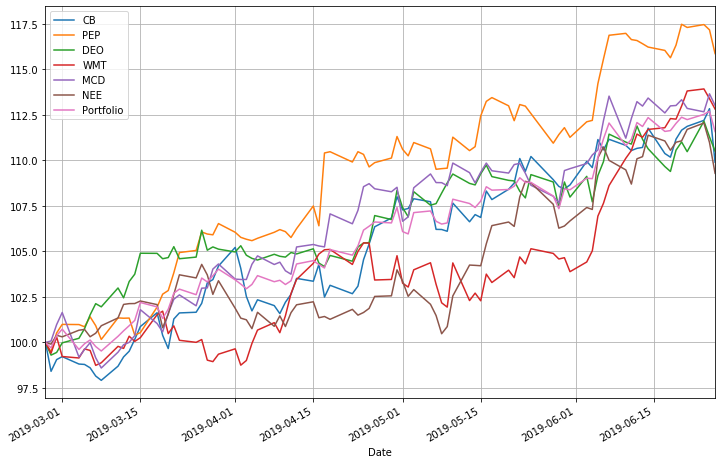

In [8]:
%pylab inline
quote.setup_mask(['CB', 'PEP', 'DEO', 'WMT', 'MCD', 'NEE'])
quote.graph(21, {'CB': 0.11, 'PEP': 0.01, 'DEO': 0.16, 'WMT': 0.05, 'MCD': 0.48, 'NEE': 0.19})